## <span style="color:blue"> Ex 8 - Stefano Schmidt </span>

### Exercise 8.2
The code in **ex_8.cpp** is designed to find recursively optimal parameters for the wave function $|\Psi_T(x)|^2$. 
The function `choose_parameters` updates iteratively the best parameters perforiming a random search among the neighbours of the current best parameter (it resembles to Tabu search). The function `perform_variational_MC` samples with Metropolis algorithm from positions distributed according the pdf. It can returns also the energy related to the sampled positions. It accepts the two parameters $\mu$ and $\sigma$ <br>
The code fills two files **positions.dat** and **energies.dat**. <br>
 - **positions.dat** holds $M = 10^5$ values of position over the x axis distributed according the optimized probability distribution function.<br>
 - **energies.dat** holds the average energy as a number of considered blocks. As usual it has been chosen a constant number $L=50$ of data per block.<br>

An histogram for the positions and a plot for the energies are done below together with a comparison with the true wavefunction computed with analytical methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

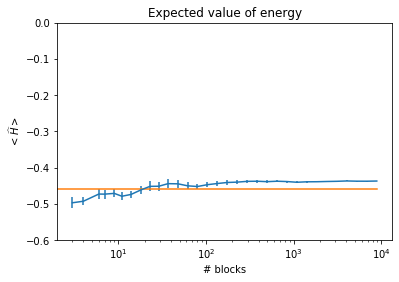

In [2]:
#plot for energy
e_data = np.loadtxt('energies.dat', dtype=float)

plt.title("Expected value of energy")
plt.xlabel("# blocks")
plt.ylabel("$<\widehat{H}>$")
plt.xscale("log")
plt.ylim(-.6,0)
plt.errorbar(e_data[:,0],e_data[:,1], xerr=None, yerr=e_data[:,2])
true_energy = -0.46046587969271535
plt.plot([0,e_data[-1,0]],[true_energy,true_energy])
plt.show()

In [3]:
def get_true_ground_state(x):
    "Returns the true ground state wavefunction by diagonalizing Schrodinger equation"
    hbar = 1
    m = 1
    N = len(x) # number of iterations
    dx = x[1] - x[0] # the step size
    V_pot = lambda x: (x**2 - 2.5)*x**2
    V= V_pot(x)
    
    CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
    H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V) #Hamiltonian
    E,psi = np.linalg.eigh(H)
    psi = np.transpose(psi)
    psi = psi/np.sqrt(dx)
    return (psi[0])**2

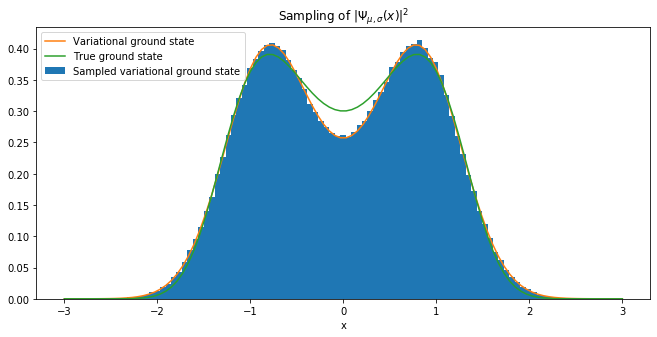

In [4]:
#plot for positions
x_data = np.loadtxt('positions.dat', dtype=float,skiprows=1)
params = np.loadtxt('positions.dat', dtype=float,max_rows=1)

plt.figure(figsize=(11,5))
plt.title("Sampling of $|\Psi_{\mu,\sigma}(x)|^2$")
plt.xlabel("x")
plt.hist(x_data, bins=100, density =True, label="Sampled variational ground state")
x=np.linspace(-3,3,100)
pdf = .95*(stats.norm.pdf(x,params[0], np.sqrt(params[1]))+stats.norm.pdf(x,-params[0], np.sqrt(params[1])))**2
plt.plot(x, pdf, label="Variational ground state")
plt.plot(x,get_true_ground_state(x), label= "True ground state")
plt.legend()
plt.show()

The solution found is quite accurate as can be seen from the plot of the energy and from the plot of the wavefunction. The solution however is strongly dependent on the the initial setting of variational parameters: the plots above are done with $\mu_0 = 1$ and  $\sigma_0 = 0.1$. Setting another parameter may not give such a good agrement with the exact result (for example setting  $\sigma_0 = 1$ gives an average energy of $\simeq -0.25$, worse than the one found here). This is of course a shortcoming of the variational procedure used to find the good variational parameters.

### Exercise 8.3
It is now used the PIMC/PIGS code for Path integral Monte Carlo. The code has been slightly changed by adding the class `TRandom3`. This class is a mimic of ROOT-CERN class `TRandom3` interface; the difference is that the implementation is done with C++ standard library, making it more portable (no installation of ROOT-CERN is required).<br>
The code is run for a both the flat wave-functions and the variational wavefunction above with parameters: $\mu = 0.840$ and $\sigma = 0.396$. It produces output files (in folder **QMC_results**) for kinetic energy, potential energy (as a function of time) and for a histogram for the sampled wavefunction for both the wavefunctions. The plot are done in the same way as above.

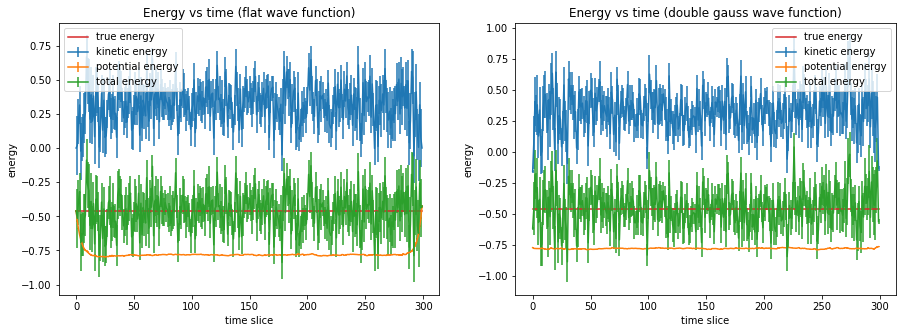

In [5]:
#flat vs. double gauss wavefunction
flat_kin = np.loadtxt('./QMC_results/flat_kinetic.dat', dtype=float) #flat wavefunction
flat_pot = np.loadtxt('./QMC_results/flat_potential.dat', dtype=float) #flat wavefunction
kin = np.loadtxt('./QMC_results/kinetic.dat', dtype=float) #double gauss wavefunction
pot = np.loadtxt('./QMC_results/potential.dat', dtype=float) #double gauss wavefunction

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Energy vs time (flat wave function)")
plt.xlabel("time slice")
plt.ylabel("energy")
plt.errorbar(flat_kin[:,0],flat_kin[:,1], xerr=None, yerr=flat_kin[:,2], label = "kinetic energy")
plt.errorbar(flat_pot[:,0],flat_pot[:,1], xerr=None, yerr=flat_pot[:,2], label = "potential energy")
err_tot = np.sqrt(flat_pot[:,2]**2+flat_kin[:,2]**2)
plt.errorbar(flat_kin[:,0],flat_pot[:,1]+flat_kin[:,1], xerr=None, yerr=err_tot, label = "total energy")
plt.plot([0,flat_kin[-1,0]],[true_energy,true_energy], label = "true energy")

plt.legend()

plt.subplot(1,2,2)
plt.title("Energy vs time (double gauss wave function)")
plt.xlabel("time slice")
plt.ylabel("energy")
plt.errorbar(kin[:,0],kin[:,1], xerr=None, yerr=kin[:,2], label = "kinetic energy")
plt.errorbar(pot[:,0],pot[:,1], xerr=None, yerr=pot[:,2], label = "potential energy")
err_tot = np.sqrt(pot[:,2]**2+kin[:,2]**2)
plt.errorbar(kin[:,0],flat_pot[:,1]+kin[:,1], xerr=None, yerr=err_tot, label = "total energy")
plt.plot([0,flat_kin[-1,0]],[true_energy,true_energy], label = "true energy")
plt.legend()
plt.show()

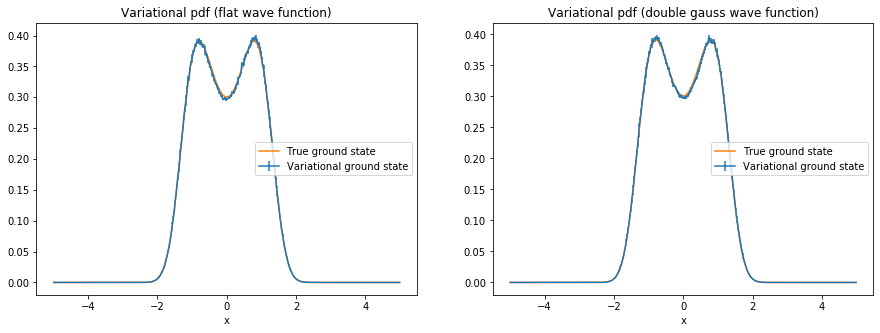

In [6]:
#flat vs. double gauss wavefunction
flat_data = np.loadtxt('./QMC_results/flat_probability.dat', dtype=float) #flat wavefunction
data = np.loadtxt('./QMC_results/probability.dat', dtype=float) # double gauss wavefunction

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Variational pdf (flat wave function)")
plt.xlabel("x")
plt.errorbar(flat_data[:,0],flat_data[:,1], xerr=None, yerr=flat_data[:,2], label ="Variational ground state")
plt.plot(data[:,0],get_true_ground_state(data[:,0]), label ="True ground state")
plt.legend()

plt.subplot(1,2,2)
plt.title("Variational pdf (double gauss wave function)")
plt.xlabel("x")
plt.errorbar(data[:,0],data[:,1], xerr=None, yerr=data[:,2], label ="Variational ground state")
plt.plot(data[:,0],get_true_ground_state(data[:,0]), label ="True ground state")
plt.legend()
plt.show()

It can be noted that the computed total energy is in exact agreement with the exact value within the statistical uncertainties (quite high actually). Both the two methods are able to compute the energy as well as the expected wavefunction: they give very similar results.

Now the temperature is raised and the histograms of wavefunctions are plotted below for different temperatures. The wavefunction chosen is the double gaussian.

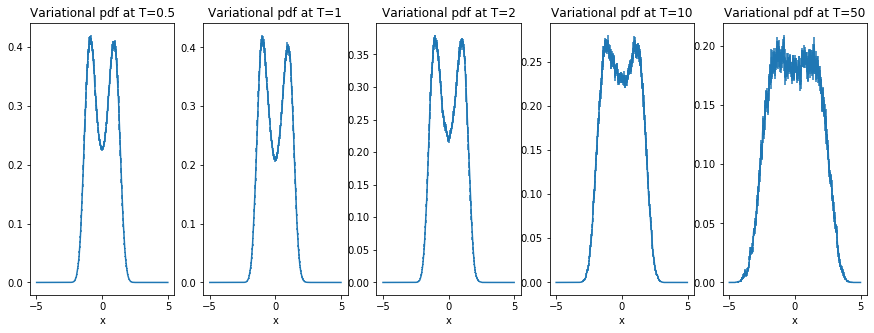

In [7]:
plt.figure(figsize=(15,5))
temps = [0.5, 1, 2, 10,50]
folder = "./QMC_results/"
files = ["T05_probability.dat","T1_probability.dat","T2_probability.dat","T10_probability.dat","T50_probability.dat"]
count = 1

for file in files:
    plt.subplot(1,5,count)
    data = np.loadtxt(folder+file)
    plt.title("Variational pdf at T="+str(temps[count-1]))
    plt.xlabel("x")
    plt.errorbar(data[:,0],data[:,1], xerr=None, yerr=data[:,2])
    count = count +1

It is clear that as the temperature increases the kinetic terms becomes more and more bigger than the potential energy. This means that the wavefunctions "cares less of the potential" as the temperature increases. This means that for high temperature the potential can be approximated to a flat well $V(x) = 1_{(-a,a)}(x)$ and thus the wavefunction gets a free wave packet, i.e. a gaussian with zero mean and suitable boundary conditions where the potential diverges.